In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, fnmatch
import math
from matplotlib import animation, rc
from IPython.display import HTML


In [2]:
%matplotlib inline


## Problem 2. Solitary wave propagation and grid effects

A solitary wave is simulated ussing the Boussinesq equations with the following parameters:

amplitude = 0.1

constant depth = 1

The grid size will be analysed. First, we use $\Delta x = 2$

In [4]:
!cat 'flat_results/flat2/indat'

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
75
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


Below you see the initial condition at $x = 20$.

In [5]:
a = np.loadtxt('flat_results/flat2/eta0',unpack=True)


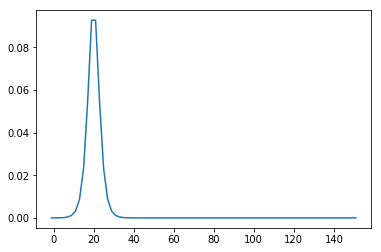

In [5]:
plt.plot(a[0], a[1])


Below you see the time evolution up to $t = 70$.

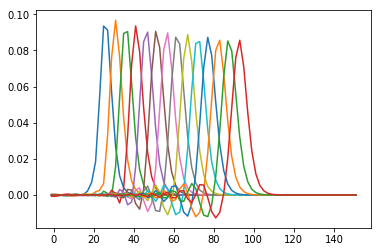

In [6]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat2/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

Dispersion occurs using $\Delta x = 2$.

Now we repeat the same procedure with $\Delta x = 1$.

Below you see the initial condition at $x = 20$.

In [92]:
! cat ./flat_results/flat1/indat

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
150
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


In [7]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)


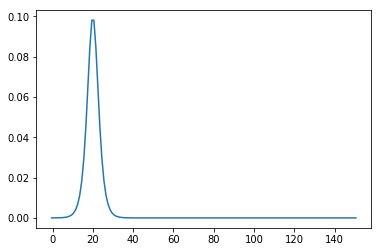

In [8]:
plt.plot(a[0],a[1])



Below you see the time evolution up to $t = 70$.

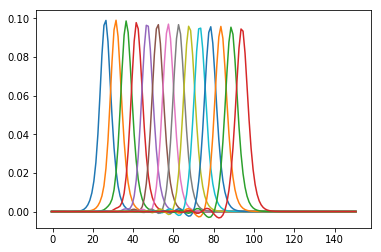

In [9]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

Dispersion is weaker using $\Delta x = 1$ than using $\Delta x = 2$.

Now we repeat the same procedure with $\Delta x = 0.5$.

Below is the initial condition at $x = 20$.

In [93]:
!cat ./flat_results/flathf/indat

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
300
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


In [10]:
a = np.loadtxt('flat_results/flathf/eta0',unpack=True)


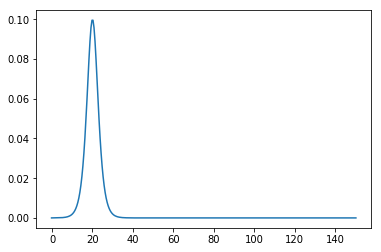

In [11]:
plt.plot(a[0],a[1])


Here, the time series up to $t = 72$ is shown.

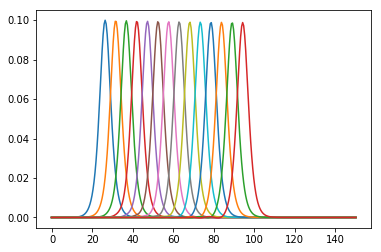

In [12]:
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

The dispersion is not visible anymore with your eyes using $\Delta x = 0.5$.

Now, we depict all three solution at $t = 71$ in the same diagramme and compare the maximums in $\eta$.

The maximum $\eta$ when choosing $\Delta x = 2$ is 0.086
The maximum $\eta$ when choosing $\Delta x = 1$ is 0.095
The maximum $\eta$ when choosing $\Delta x = 0.5$ is 0.099


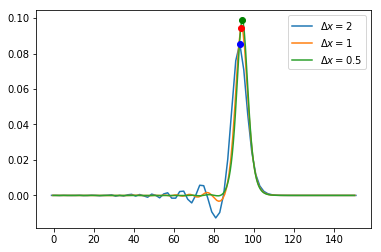

In [13]:
num = '71'

a = np.loadtxt('flat_results/flat2/eta'+num,unpack=True)
b = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
c = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)

plt.plot(a[0], a[1], label='$\Delta x = 2$')
plt.plot(b[0], b[1], label='$\Delta x = 1$')
plt.plot(c[0], c[1], label='$\Delta x = 0.5$')

max1 = max(a[1])
max2 = max(b[1])
max3 = max(c[1])
a1 = [i for i, j in enumerate(a[1]) if j == max1]
b1 = [i for i, j in enumerate(b[1]) if j == max2]
c1 = [i for i, j in enumerate(c[1]) if j == max3]
plt.plot(a[0][a1[0]],max1,'bo',b[0][b1[0]],max2,'ro',c[0][c1[0]],max3,'go')
plt.legend()

print('The maximum $\eta$ when choosing $\Delta x = 2$ is %.3f' %max1)
print('The maximum $\eta$ when choosing $\Delta x = 1$ is %.3f' %max2)
print('The maximum $\eta$ when choosing $\Delta x = 0.5$ is %.3f' %max3)

The maximum in $\eta$ converts to the value of the initial amplitude, $\alpha = 0.1$, with a finer grid resolution. The maximum is lower the larger the dispersion is, because a conservation of water volume has to be maintained: A lower water level behind the wave causes a lower maximum.

A grid resolution of $\Delta x = 0.5$ is reasonable enough. The error in the maximum in $\eta$ is only: $e = \frac{0.1-0.099}{0.1} = 1\%$.


So far we have showed a numerical Boussinesq simulation of a solitary wave. Numerical dispersion, which vanishes with a small enough gird size, is dependend on the grid resolution.

## Problem 3. Numerical instability

We will switch from a Boussinesq simulation to a LSW simulation. Still, we use a solitary wave for the initial condition.

The following parameters are used:

$\Delta x = 0.5$

$\Delta t = 1$

and a reduction factor of $0.5$ results in a exact numerical solution ($Co = 1$).

In [14]:
!cat 'flat_results/lsw3/indat'

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
300
! give equation type/LSW/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
41
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:40;5


Below is the initial condition at $x=20$.

In [3]:
a = np.loadtxt('flat_results/lsw3/eta0',unpack=True)


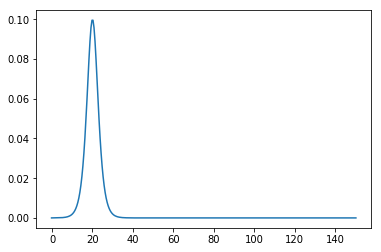

In [4]:
plt.plot(a[0],a[1])


Here, the time evolution up to $t = 41$ is shown.

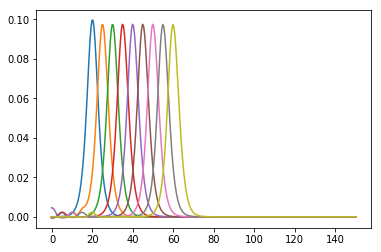

In [5]:
for i in np.arange(0,41,5):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

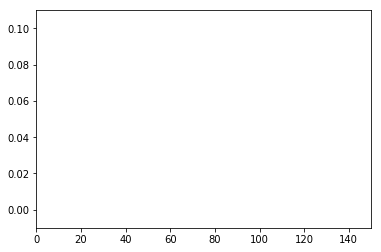

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.05, 150))
ax.set_ylim((-0.01, 0.11))

line, = ax.plot([], [], lw=2)

In [7]:
def init():
    line.set_data([], [])
    return (line,)


In [8]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [9]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,41,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

We let the simulation run. Then an initial condition splits into two solutions travelling in both directions.

In the previous case we use the Boussinesq equations. A solitary wave is used for the initial condition, which is a solution for non-linear and dispersive systems like the Boussinesq equations. It means that the initial condition is already a solution. That's why the wave does not split into two waves travelling in both directions. As a result the solitary wave keeps the initial shape and travels along the positive x-direction.

In this case we use the LSW equations. The solitary wave solution is no longer an exact solution. It means that the initial condition is not already a solution. Therefore, the solitary wave splits into two solutions, one with a similar shape as the solitary wave itself and another solution with a relatively small amplitude. Both are travelling in opposite directions.


Up to this point, we have showed a numerical Boussinesq and LSW simulation of a solitary wave. Next we will use a different initial condition for the simulations.

## Problem 4. Wave dispersion

Make the derivative and the expansion to see the leading order

In [15]:
def eta(x,x0,lam):
    A = 0.1
    dif = x-x0
    fun = np.zeros(len(x))
    for i in range(len(x)):
        if -0.5*lam < dif[i] < 0.5*lam:
            fun[i] = 2*A*np.cos(np.pi*dif[i]/lam)**2
    return fun

In [82]:
!cat ./flat_results/flat1/

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
150
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


In [64]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)


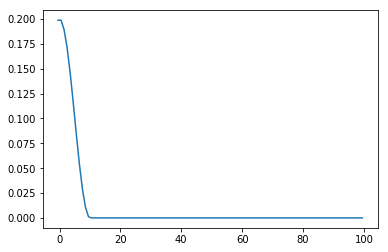

In [66]:
ola = eta(a[0],0,20)
cosa =a[0]
plt.plot(cosa[0:101],ola[0:101])


In [67]:
arc = open('flat_results/cosine/eta.in','w')
np.savetxt(arc,np.c_[cosa[0:101],ola[0:101]])
arc.close()


In [68]:
h = np.ones(101)
arc = open('flat_results/cosine/h','w')
np.savetxt(arc,np.c_[cosa[0:101],h])
arc.close()


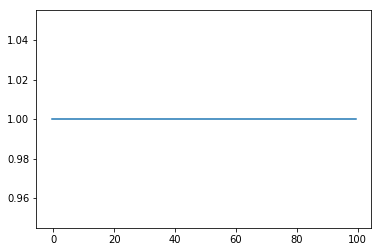

In [70]:
a = np.loadtxt('flat_results/cosine/h',unpack=True)
plt.plot(a[0],a[1])


### a) Grid Size

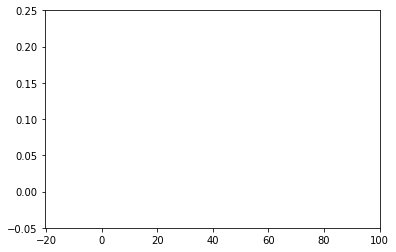

In [76]:
fig, ax = plt.subplots()

ax.set_xlim(( -20.5, 100))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)


In [77]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [78]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


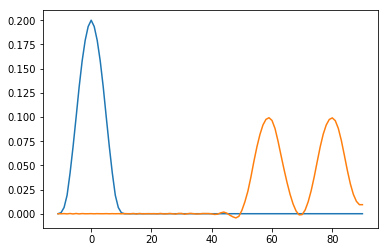

In [83]:
a = np.loadtxt('flat_results/cosine/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine/eta80',unpack=True)
plt.plot(b[0], b[1])


In [84]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine200/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [85]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())



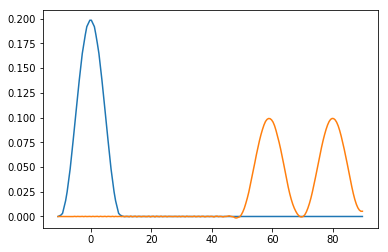

In [37]:
a = np.loadtxt('flat_results/cosine200/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine200/eta80',unpack=True)
plt.plot(b[0], b[1])


In [38]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine400/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)


In [39]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


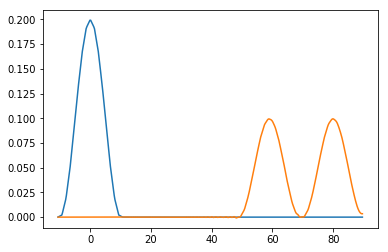

In [40]:
a = np.loadtxt('flat_results/cosine400/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine400/eta80',unpack=True)
plt.plot(b[0], b[1])


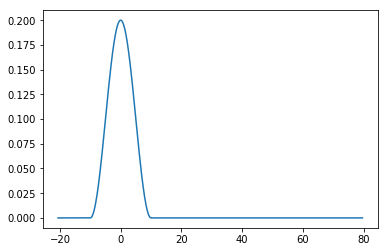

In [41]:
ola = eta(a[0]-10,0,20)
cosa =a[0]-10
plt.plot(cosa,ola)

In [42]:
arc = open('flat_results/cosine_move/eta.in','w')
np.savetxt(arc,np.c_[cosa,ola])
arc.close()

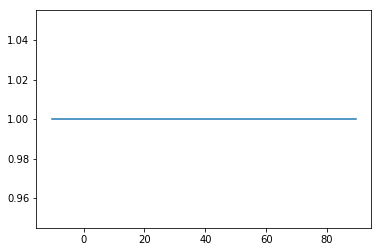

In [47]:
a = np.loadtxt('flat_results/cosine400/h',unpack=True)
plt.plot(a[0],a[1])

In [48]:
arc = open('flat_results/cosine_move/h','w')
np.savetxt(arc,np.c_[cosa[0:-1],a[1]])
arc.close()

In [50]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine_move/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [51]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


It is the two waves spliting. there is dipersion with a non fine grid, when $\Delta x $

### b)  Linearized Boussinesq

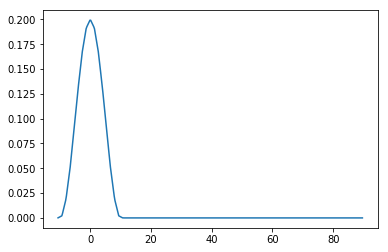

In [52]:
a = np.loadtxt('flat_results/lbous/eta0',unpack=True)
plt.plot(a[0],a[1])

In [53]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [54]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

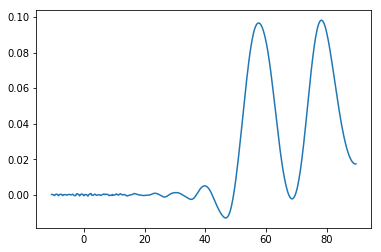

In [55]:
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1])

It is the physical disperion visible. 

### c) Ful Boussineq

In [56]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/fbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [57]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

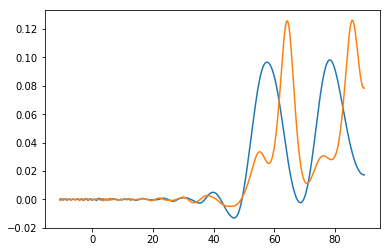

In [58]:
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1])
b = np.loadtxt('flat_results/fbous/eta80',unpack=True)
plt.plot(b[0],b[1])

Also dispersive but this one change shape due to the nonlinearities.

### d) NLSW

In [59]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4-1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [60]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

this equation ar just nonlinear, without dispersion. these ripples are conseuence of the nonlinearity and the appear with the differener grid resolutions, so they are not artifacts.

In [61]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4d2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [62]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

It is steepening. 

### d) Shapes before the artifacts

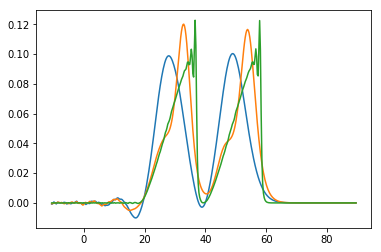

In [63]:
a = np.loadtxt('flat_results/lbous/eta50',unpack=True)
plt.plot(a[0],a[1])
b = np.loadtxt('flat_results/fbous/eta50',unpack=True)
plt.plot(b[0],b[1])
c = np.loadtxt('flat_results/nlsw4-1/eta50',unpack=True)
plt.plot(c[0],c[1])

the back part of the wave moves faster than the front, then the wave steepens. When the equation considers the nonlinearities this present on the solution.  If the dispesion is out of the picture, then nonlinear effects are present in the crets of the wave. When there is dispersion also, the shape of the wave is more flat and the wave never steepens

The dispersive effect makes the front wave flatter with time, and the non-linear effect makes the front wave steeper. Considering the full Boussinesq equations, the dispersive effect weakens the non-linear effect at the leading wavefront. So the artifact would happen at a later time?

## Problem 5 . Bores

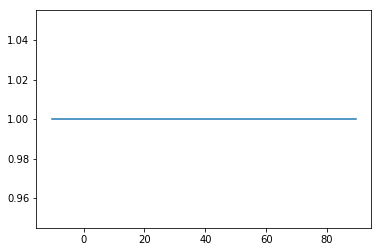

In [11]:
a = np.loadtxt('flat_results/lbous/h',unpack=True)
plt.plot(a[0],a[1])

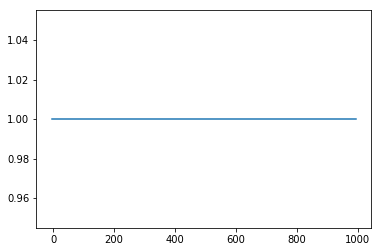

In [12]:
plt.plot(10*a[0]+100,a[1])

In [13]:
arc = open('flat_results/bores-nl/h','w')
np.savetxt(arc,np.c_[10*a[0]+100,a[1]])
arc.close()

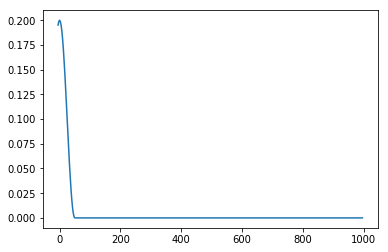

In [17]:
ola = eta(10*a[0]+100,0,100)
cosa =10*a[0]+100
plt.plot(cosa,ola)

In [18]:
arc = open('flat_results/bores-nl/eta.in','w')
np.savetxt(arc,np.c_[cosa,ola])
arc.close()

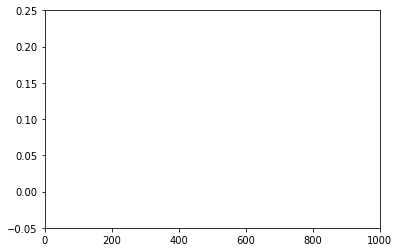

In [19]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.5, 1000))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

### a) NLSW and Boussinesq, t < 200

In [20]:
def animate(i): #(i,path)
    num = str(i)
    a = np.loadtxt('flat_results/bores-nl/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    #line.set_label('time %d'%(i))
    #legend=plt.legend()
    return (line,)


#line.set_label('line %d, stage %d'%(j,i))
 #   legend.remove()
  #  legend = plt.legend()
   # return lines + [legend]

In [21]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

In [25]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-bous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [26]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

(-0.01, 0.15)

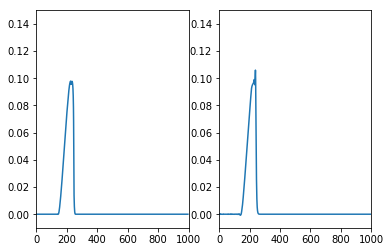

In [29]:
a = np.loadtxt('flat_results/bores-nl/eta205',unpack=True)
plt.subplot(1,2,1)
plt.plot(a[0],a[1])
plt.xlim(0,1000)
plt.ylim(-0.01,0.15)
b = np.loadtxt('flat_results/bores-bous/eta205',unpack=True)
plt.subplot(1,2,2)
plt.plot(b[0],b[1])
plt.xlim(0,1000)
plt.ylim(-0.01,0.15)

### b) Boussinesq and solitary wave

In [28]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(205,800,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

(-0.01, 0.25)

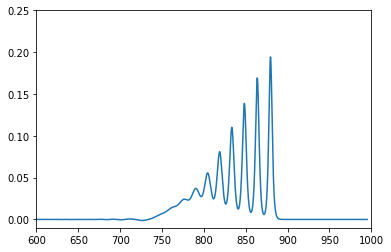

In [35]:
b = np.loadtxt('flat_results/bores-bous/eta795',unpack=True)
plt.plot(b[0],b[1])
plt.xlim(600,1000)
plt.ylim(-0.01,0.25)

In [80]:
crest = max(b[1][3400:3500])
x0 = list(b[1]).index(crest)

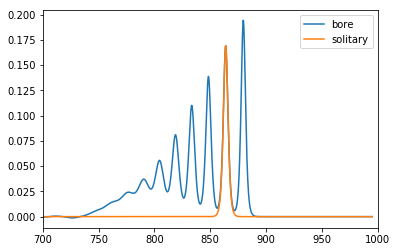

In [81]:
alpha = crest

def sech2(x):
    return 1/(np.cosh(x))**2

argum = 0.5*np.sqrt(3*alpha)*(b[0]-b[0][x0])
ola = alpha*sech2(argum)
plt.plot(b[0],b[1], label='bore' )
plt.plot(b[0],ola, label='solitary')
plt.xlim(700,1000)
plt.legend()


### c) Undular bore

In [90]:
!cat flat_results/bores-c/indat

!give bathimetry option/readfromfile/
readfromfile
! give filename/
h 
!Give number of grid points/ 100/
600
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.050000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
200
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:201;5


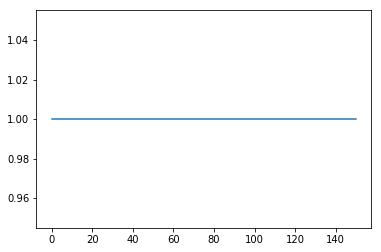

In [99]:
a = np.loadtxt('flat_results/flat1/h',unpack=True)
plt.plot(a[0],a[1])

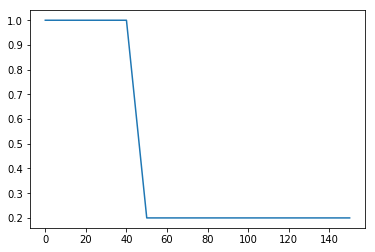

In [100]:
h = np.zeros(len(a[0]))
for i in range(len(h)):
    if a[0][i]<40:
        h[i] = 1.
    elif a[0][i]<50:
        h[i] = 4.2-0.08*(a[0][i])
    elif a[0][i] <= 150:
        h[i] = 0.2
plt.plot(a[0],h)

In [101]:
arc = open('flat_results/bores-c/h','w')
np.savetxt(arc,np.c_[a[0],h])
arc.close()

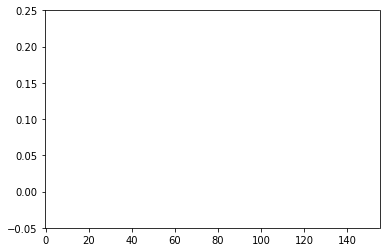

In [87]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.5, 155))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

In [88]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-c/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [89]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,201,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

We have a solitary wave moving in one direction with constant depth. When it reaches the slope, the wave becomes like an intial condition similar to the previous exercise. As a consequence, it splits in two (these waves are not longer solitary waves). The non-linearities appears again in the front of the wave. The dispersion also appears with the slope. when the depth is constant again then the wavefront remains the same? 


Solitary wave not solutuion of bousinesq eq

first, the bores are caused numerically due to the non-linear effects. But the code generates many fake solitary wave solutions (=bores), where each crest is exactly the same as the KdV-solitary-wave-solution.
second, the bores are caused physically due to the slope.

## Problem 6 Numerical dispersion 

We compare numerical dispersion with physical dispersion in this last problem. The numerical dispersion is simulated by the LSW equations and the physical dispersion by the linearised Boussinesq equations.

You see the bathymetry profile below ($h_0 = 1$)

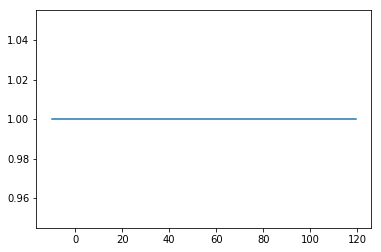

In [82]:
l = np.arange(-10,120,0.5)
h = np.ones(len(l))
plt.plot(l,h)

The initial condition at $x = 0$ is shown below:

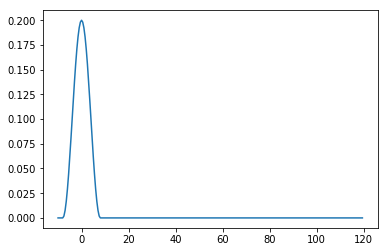

In [83]:
ola = eta(l,0,16)
plt.plot(l,ola)

In [84]:
arc = open('flat_results/last1/h','w')
np.savetxt(arc,np.c_[l,h])
arc.close()
arc = open('flat_results/last1/eta.in','w')
np.savetxt(arc,np.c_[l,ola])
arc.close()

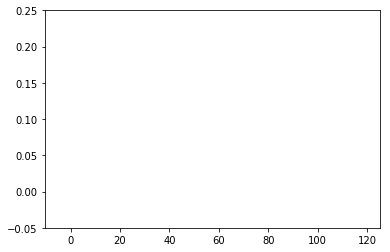

In [85]:
fig, ax = plt.subplots()

ax.set_xlim(( -10.5, 125))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)

We start with the linearised Boussinesq simulation. The paramters are:

$\Delta x = \Delta t = 0.5$, so that the solution is exact ($Co = \frac{\sqrt{h_0}\Delta t}{\Delta x} = 1$. The dispersion is caused physically only and there is absolutely no numercial dispersion.

In [86]:
!cat 'flat_results/last1/indat'

! give bathimetry option/readfromfile/
readfromfile
! give depthfilename/  h/
h
!Give number of grid points/ 260/
260
! give equation type/LBouss/
LBouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data name of file/
eta.in
! give u1-data
stop
! Prop. towards decreasing x/ja/
no
!Number of cycles
252
!give time interval
-1
!give timestep
0.5
!give number of time steps in interval directly
2
!times for printing
1 4:250;5



Below an animation of the linearised Boussinesq simulation:

In [92]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [93]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

In [94]:
130/(np.sqrt(17)*0.5)


63.059262509446576

That was the simulation using the linearised Boussinesq equations. Next, we simulate the same wave using the LSW equations.

The paramters are:

$\Delta x = 0.5 \cdot \sqrt{17} \text{ and } \Delta t = 0.5$. This time the solution is not exact anymore, because $Co = \frac{\sqrt{h_0}\Delta t}{\Delta x} = \frac{1}{\sqrt{17}} = 0.243 < 1$. Therfore numerical dispersion occurs.

In [95]:
!cat 'flat_results/last2/indat'

! give bathimetry option/readfromfile/
readfromfile
! give depthfilename/  h/
h
!Give number of grid points/ 260/
63
! give equation type/LBouss/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data name of file/
eta.in
! give u1-data
stop
! Prop. towards decreasing x/ja/
no
!Number of cycles
252
!give time interval
-1
!give reduction factor for dt/dx
0.5
!give timsteps in interval
2
!times for printing
1 4:250;5


Below the LSW animation:

In [96]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    return (line,)

In [97]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

Let us depict both the linear Boussinesq and the LSW solutions at a time just before they reach the border.

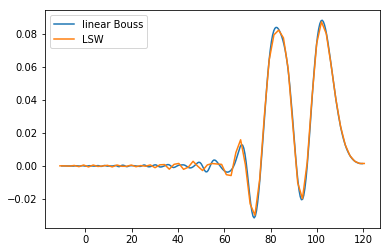

In [98]:
a = np.loadtxt('flat_results/last1/eta105',unpack=True)
plt.plot(a[0],a[1],label='linear Bouss')
b = np.loadtxt('flat_results/last2/eta105',unpack=True)
plt.plot(b[0],b[1],label='LSW')
plt.legend(loc='best')

Both solutions are very similar due to the choice of the Courant number $Co$ for the LSW simulation.

The expression of $\omega$ for the Boussinesq equations is similar to the numerical dispersion relation for the LSW equations:

$$\omega = \pm \sqrt{h_0} k \Big(1-b \cdot (kh_0)^2 + O((kh_0)^4) \Big)$$

Having a look at the first problem, $b = \frac{1}{6}$ for the physical dispersion relation of the Boussinesq equations, and $b = \frac{\Delta x^2}{24h_0^2} - \frac{\Delta t^2}{24}$ for the numercial dispersion relation of the LSW equations.

We shall get approximatly the same dispersion properties for the numerical LSW solution as for the exact Boussinesq solution when we set

$$\frac{\Delta x^2}{24h_0^2} - \frac{\Delta t^2}{24} = \frac{1}{6}$$

After some transformations we get $\Delta x = h_0 \sqrt{4+\Delta t^2}$. Setting $\Delta t = 0.5$ according to the problem task, we get $\Delta x = 0.5 \cdot \sqrt{17}$, which is the value given in the problem task.

Taken together, both solutions are so similar due to similar dispersion properties, no matter if it is numerical or physical dispersion.